In [18]:
import numpy as np    
import pandas as pd
from sklearn import tree   


In [19]:
df = pd.read_csv('E:\Python\ML\PastHires.csv')
df1 = df[df.columns[range(1,6)]]
df2 = df[df.columns[-1]]
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Dell\AppData\Local\Temp\ipykernel_14960\3650099070.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('E:\Python\ML\PastHires.csv')


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Years Experience    13 non-null     int64 
 1   Employed?           13 non-null     object
 2   Previous employers  13 non-null     int64 
 3   Level of Education  13 non-null     object
 4   Top-tier school     13 non-null     object
 5   Interned            13 non-null     object
 6   Hired               13 non-null     object
dtypes: int64(2), object(5)
memory usage: 860.0+ bytes


In [21]:
df['Level of Education'].unique

<bound method Series.unique of 0      BS
1      BS
2      BS
3      MS
4     PhD
5     PhD
6      MS
7      BS
8      BS
9      BS
10    PhD
11     BS
12    PhD
Name: Level of Education, dtype: object>

In [22]:
d = {'Y':1,'N':0}
df['Employed?'] = df['Employed?'].map(d)
e = {'BS':1,'MS':2,'PhD':3}
df['Level of Education'] = df['Level of Education'].map(e)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
df['Hired'] = df['Hired'].map(d)

In [23]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,1,0,0,1
1,0,0,0,1,1,1,1
2,7,0,6,1,0,0,0
3,2,1,1,2,1,0,1
4,20,0,2,3,1,0,0


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Years Experience,13.0,5.153846,6.348834,0.0,0.0,3.0,7.0,20.0
Employed?,13.0,0.384615,0.506370,0.0,0.0,0.0,1.0,1.0
Previous employers,13.0,1.769231,2.006400,0.0,0.0,1.0,2.0,6.0
Level of Education,13.0,1.769231,0.926809,1.0,1.0,1.0,3.0,3.0
Top-tier school,13.0,0.461538,0.518875,0.0,0.0,0.0,1.0,1.0
Interned,13.0,0.384615,0.506370,0.0,0.0,0.0,1.0,1.0
Hired,13.0,0.692308,0.480384,0.0,0.0,1.0,1.0,1.0


In [25]:
num = df.select_dtypes(exclude='object').columns.to_list()
num

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned',
 'Hired']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import  export_graphviz
from IPython.display import Image
import pydotplus

In [27]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In [28]:
features = list(df.columns[0:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [29]:
y= df['Hired']
x = df[features]

In [30]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x,y)
model

DecisionTreeClassifier(criterion='entropy')

In [31]:
y_pred = model.predict(x)

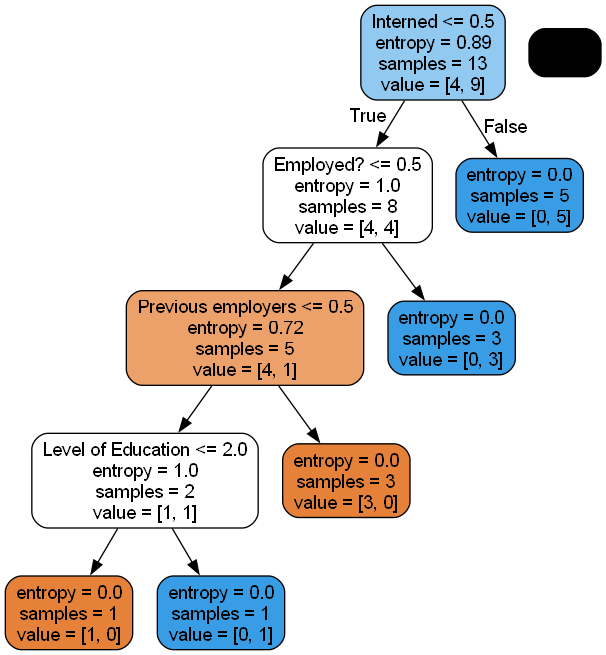

In [ ]:
dot_data = export_graphviz(model, feature_names=x.columns, out_file=None, rounded=True, proportion=False, precision=2,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
df[['Interned','Hired']].sort_values(by= 'Interned')

,Interned,Hired
0,0,1
2,0,0
3,0,1
4,0,0
12,0,1
10,0,0
9,0,0
8,0,1
7,1,1
6,1,1


In [ ]:
df[['Employed?','Hired']].sort_values(by= 'Employed?')

,Employed?,Hired
1,0,1
2,0,0
5,0,1
4,0,0
7,0,1
12,0,1
10,0,0
9,0,0
6,1,1
3,1,1


In [ ]:
df[['Level of Education','Hired']].sort_values(by= 'Level of Education')

,Level of Education,Hired
0,1,1
1,1,1
2,1,0
7,1,1
9,1,0
11,1,1
8,1,1
3,2,1
6,2,1
5,3,1


In [ ]:
df[['Top-tier school','Hired']].sort_values(by= 'Top-tier school')

,Top-tier school,Hired
0,0,1
2,0,0
6,0,1
7,0,1
9,0,0
11,0,1
8,0,1
3,1,1
4,1,0
5,1,1


In [ ]:
df['Level of Education'].value_counts()

Level of Education
1    7
3    4
2    2
Name: count, dtype: int64

In [ ]:
df['Previous employers'].value_counts()

Previous employers
0    4
1    4
2    2
4    1
6    1
5    1
Name: count, dtype: int64

In [ ]:
df['Years Experience']=pd.cut(df['Years Experience'], bins=[0,5,10,15,20], labels=[0,1,2,3], include_lowest=True)
df['Previous employers']=pd.cut(df['Previous employers'], bins=[0,1,3,5,7], labels=[0,1,2,3], include_lowest=True)

In [ ]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,1,1,2,1,0,0,1
1,0,0,0,1,1,1,1
2,1,0,3,1,0,0,0
3,0,1,0,2,1,0,1
4,3,0,1,3,1,0,0
5,0,0,0,3,1,1,1
6,0,1,1,2,0,1,1
7,0,0,0,1,0,1,1
8,2,1,2,1,0,0,1
9,0,0,0,1,0,0,0


In [ ]:
df['Previous employers']

0     2
1     0
2     3
3     0
4     1
5     0
6     1
7     0
8     2
9     0
10    0
11    0
12    0
Name: Previous employers, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [ ]:
import math
def entropy(col):
    counts = col.value_counts()
    probabilities = counts/len(col)
    return -sum(probabilities*probabilities.apply(math.log2))

def conditional_entropy(data, feature, target):
    feature_vals = data[feature].unique()
    weighted_entropy = 0
    for value in feature_vals:
        subset = data[data[feature] == value]
        weighted_entropy+= (len(subset)/len(data)) * entropy(subset[target])
    return weighted_entropy

def info_gain(data,feature,target):
    total_entropy = entropy(df[target])
    feature_conditional_entropy = conditional_entropy(data, feature, target)
    return total_entropy - feature_conditional_entropy

for feature in features:
    ig = info_gain(df,feature,'Hired')
    print(f"Info gain for {feature}:{ig}")


Info gain for Years Experience:0.2075808280212158
Info gain for Employed?:0.2751070248348759
Info gain for Previous employers:0.23739740978310186
Info gain for Level of Education:0.11804210329899778
Info gain for Top-tier school:0.0019055645046179848
Info gain for Interned:0.2751070248348759


In [ ]:
import math
def gini(col):
    counts = col.value_counts()
    probabilities = counts/len(col)
    return 1-sum(probabilities**2)

for feature in features:
    g = gini(df[feature])
    print(f"gini index for {feature}:{g}")

gini index for Years Experience:0.485207100591716
gini index for Employed?:0.47337278106508873
gini index for Previous employers:0.5680473372781065
gini index for Level of Education:0.591715976331361
gini index for Top-tier school:0.4970414201183432
gini index for Interned:0.47337278106508873


In [ ]:
accuracy_score(y,y_pred)

1.0

In [ ]:
df1 = df[df['Interned']==1]
a = df1[['Interned','Hired']]
a

,Interned,Hired
1,1,1
5,1,1
6,1,1
7,1,1
11,1,1


In [ ]:
df2 = df[df['Interned']==0]
b = df2[['Interned','Hired']]
b

,Interned,Hired
0,0,1
2,0,0
3,0,1
4,0,0
8,0,1
9,0,0
10,0,0
12,0,1
